<a href="https://colab.research.google.com/github/lekhana1/Machine-Learning/blob/master/VGG16_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!gsutil -m cp -r gs://proobj/t*.zip .

Copying gs://proobj/test.zip...
Copying gs://proobj/train.zip...
- [2/2 files][  1.7 GiB/  1.7 GiB] 100% Done  40.8 MiB/s ETA 00:00:00           
Operation completed over 2 objects/1.7 GiB.                                      


In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/Fat Hen/53

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/c0461776c.png      
  inflating: test/4bbfd1e05.png      
  inflating: test/1d0cbd819.png      
  inflating: test/93079d970.png      
  inflating: test/856f2910a.png      
  inflating: test/976e4e079.png      
  inflating: test/b31292706.png      
  inflating: test/29bab7cad.png      
  inflating: test/37297a64c.png      
  inflating: test/f2dc546ca.png      
  inflating: test/b6a3f7876.png      
  inflating: test/8874bba69.png      
  inflating: test/1459e96a0.png      
  inflating: test/9a3f20121.png      
  inflating: test/5315c2dca.png      
  inflating: test/b7a7f6390.png      
  inflating: test/20e562fd5.png      
  inflating: test/e3f50adfc.png      
  inflating: test/6ba4ef411.png      
  inflating: test/acdb75e00.png      
  inflating: test/e0ec5b6a1.png      
  inflating: test/219fd68d5.png      
  inflating: test/41f1c3cdb.png      
  inflating: test/8c98a6e9b.png      
  inflating: test/1bf9b94a6.png      
  inflating:

In [0]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
#LABELLING
Train_DATA_FOLDER= "train"
images = []
classes = []
missing = 0
for class_folder_name in os.listdir(Train_DATA_FOLDER):
    class_folder_path = os.path.join(Train_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
   
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None:
          missing += 1
          continue
        images.append(image_bgr)
       
        classes.append(class_label)

In [0]:
#RESIZING IMAGES
def resize_images(img):
  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(224,224), interpolation = cv2.INTER_CUBIC)
  return res

images = [resize_images(img) for img in images]
print("Size of input images:",images[0].shape)

Size of input images: (224, 224, 3)


In [0]:
#ONE HOT ENCODING
enc = LabelBinarizer()
y = enc.fit_transform(classes)
y[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [0]:
#SPLITTING TRAIN DATA
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size = 0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

print("Training dataset size:",len(X_train))
print("Validation dataset size:",len(X_val))
print("Test dataset size:",len(X_test))
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

Training dataset size: 3040
Validation dataset size: 760
Test dataset size: 950


In [0]:
#LIBRARIES
import keras
from keras.models import Sequential,Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
img_height,img_width=224,224

In [86]:
#VGG16 MODEL
model=applications.VGG16(weights='imagenet',include_top=False,input_shape=(img_height,img_width,3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [87]:
x=model.output
x=Conv2D(512,(3,3),strides=1)(x)
x=BatchNormalization()(x)
x=Flatten()(x)
x = Dense(512, activation='relu')(x)
x= Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x= Dropout(0.5)(x)

predictions = Dense(12, activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)


for layer in model.layers[:13]:
    layer.trainable = False
    
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=["accuracy"])
checkpoint=ModelCheckpoint("vgg16.h5",monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=True,mode='auto',period=1)


history=model.fit(X_train,y_train,
          batch_size=32,
          epochs=20,
          verbose=1, shuffle=True, validation_data=(X_val,y_val),callbacks=[checkpoint])



 


Train on 3040 samples, validate on 760 samples
Epoch 1/20
3040/3040 [==============================] - 36s 12ms/step - loss: 2.8402 - acc: 0.1674 - val_loss: 1.7735 - val_acc: 0.4368

Epoch 00001: val_acc improved from -inf to 0.43684, saving model to vgg16.h5
Epoch 2/20
3040/3040 [==============================] - 23s 8ms/step - loss: 1.8748 - acc: 0.4033 - val_loss: 1.2127 - val_acc: 0.6158

Epoch 00002: val_acc improved from 0.43684 to 0.61579, saving model to vgg16.h5
Epoch 3/20
3040/3040 [==============================] - 23s 8ms/step - loss: 1.3853 - acc: 0.5526 - val_loss: 0.9003 - val_acc: 0.7039

Epoch 00003: val_acc improved from 0.61579 to 0.70395, saving model to vgg16.h5
Epoch 4/20
3040/3040 [==============================] - 24s 8ms/step - loss: 1.0812 - acc: 0.6352 - val_loss: 0.7030 - val_acc: 0.7961

Epoch 00004: val_acc improved from 0.70395 to 0.79605, saving model to vgg16.h5
Epoch 5/20
3040/3040 [==============================] - 24s 8ms/step - loss: 0.8606 - acc: 

Text(0.5, 1.0, 'Loss Curves')

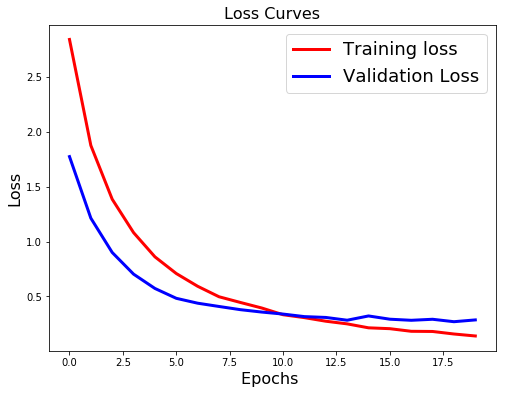

In [88]:
#LossCurves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

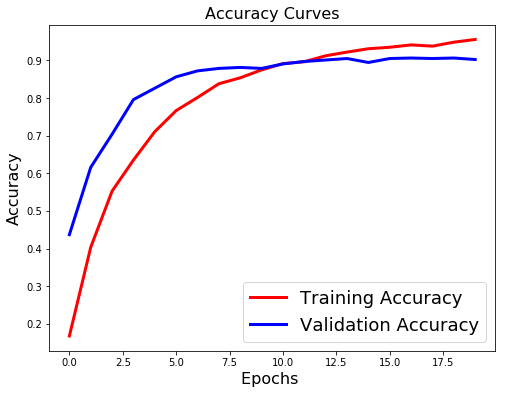

In [89]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [90]:
#PREDICTION

from sklearn.metrics import*
from keras.models import load_model

Y_pred=model.predict(X_test)
y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(y_test,axis=1)
confusion_max=confusion_matrix(Y_true,y_pred_classes)
print(confusion_max)
print(classification_report(y_pred_classes,Y_true))

[[ 21   0   0   0   0   0  24   0   0   0   0   0]
 [  0  76   0   1   0   0   0   0   0   0   0   0]
 [  0   1  54   1   0   0   1   0   1   2   1   3]
 [  0   0   0 112   0   0   0   0   2   2   1   0]
 [  3   0   0   0  40   0   1   1   1   0   0   0]
 [  0   1   0   1   2  90   3   1   1   0   0   0]
 [ 14   0   0   0   2   1 113   0   0   0   0   0]
 [  0   0   0   0   1   0   0  47   0   0   0   1]
 [  0   0   0   1   0   0   1   1  97   2   0   0]
 [  0   0   0   3   0   0   0   0   5  43   2   0]
 [  0   0   0   0   0   0   1   0   1   0  79   0]
 [  0   0   0   1   1   1   0   0   2   0   0  82]]
              precision    recall  f1-score   support

           0       0.47      0.55      0.51        38
           1       0.99      0.97      0.98        78
           2       0.84      1.00      0.92        54
           3       0.96      0.93      0.95       120
           4       0.87      0.87      0.87        46
           5       0.91      0.98      0.94        92
        